In [24]:
import csv
with open('haberman.csv') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('haberman.csv','w') as f:
    w = csv.writer(f)
    w.writerow(['Age','YearOfSurgery','Nodes','LivedAfter'])
    w.writerows(data)         
#added headers to the data

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
haberman = pd.read_csv("haberman.csv")
haberman.head() #reading the data what it is...

Age  YearOfSurgery  Nodes  LivedAfter
0   30             64      1           1
1   30             62      3           1
2   30             65      0           1
3   31             59      2           1
4   31             65      4           1

In [6]:
#lets see how many examples we have in each year
haberman["LivedAfter"].value_counts()


1    225
2     81
Name: LivedAfter, dtype: int64

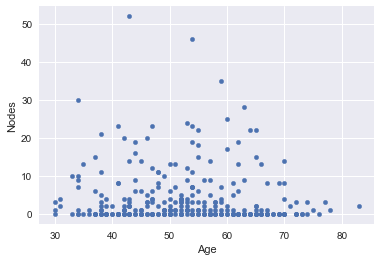

In [7]:
#lets plot a scatter plot using Age and Axilary Nodes

%matplotlib inline
haberman.plot(kind = "scatter", x="Age", y="Nodes")

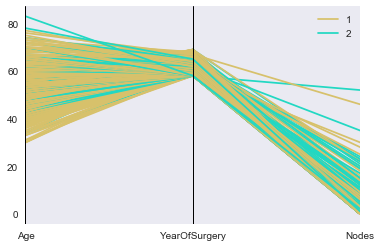

In [11]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(haberman, "LivedAfter")

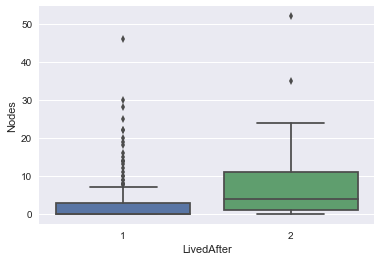

In [12]:
%matplotlib inline
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="LivedAfter", y="Nodes", data=haberman)


We can see a important observation here.i.e If the detected axillary nodes are more than 4 then in more than 50% cases the patients dies within 5 years.


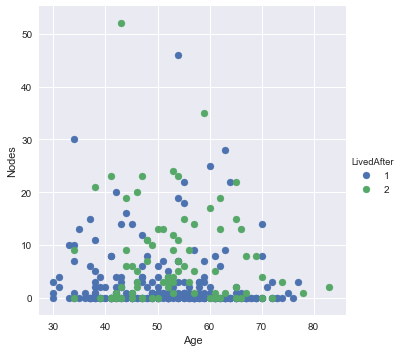

In [13]:
sns.FacetGrid(haberman, hue="LivedAfter", size=5) \
   .map(plt.scatter, "Age", "Nodes") \
   .add_legend()    #lets see whether there is any dependencies between more age and more number of nodes being detected
#we need to predict the chance of survival so we make the hue as "livedafter"

nothing can be distinguished from the scatter plot

In [1]:
sns.pairplot(haberman, hue="LivedAfter", size= 3)

NameError: name 'sns' is not defined

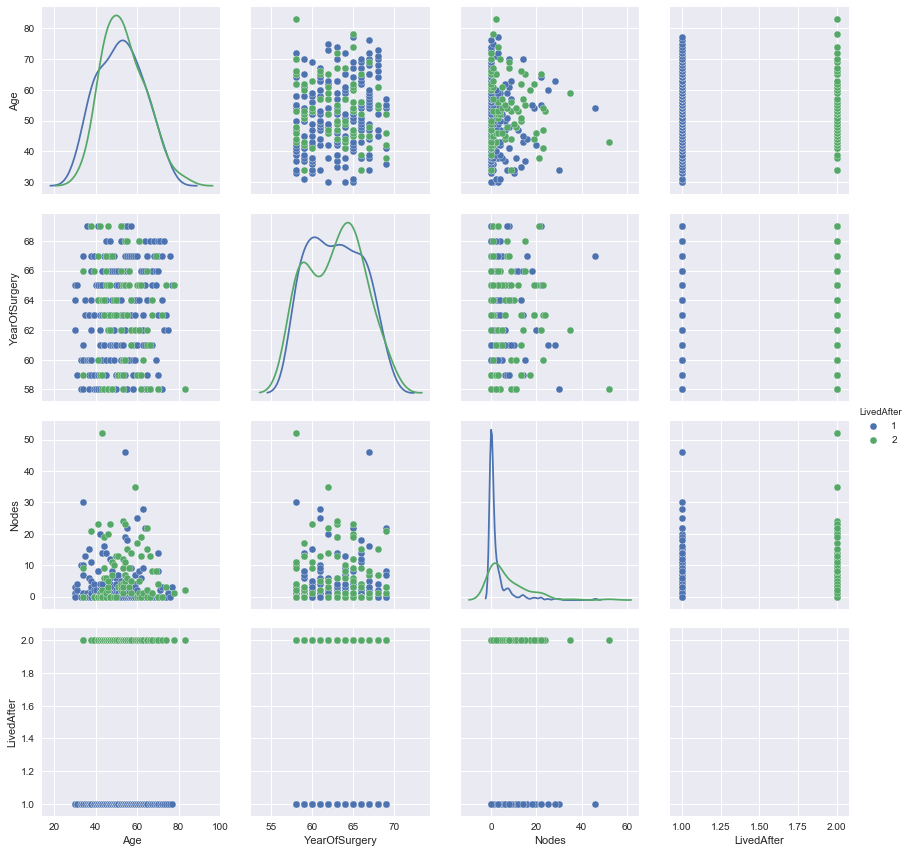

In [14]:
#we can see all the combinations of the 4 features provided in the dataset with seaborn pair plot
sns.pairplot(haberman, hue="LivedAfter", size=3, diag_kind="kde")

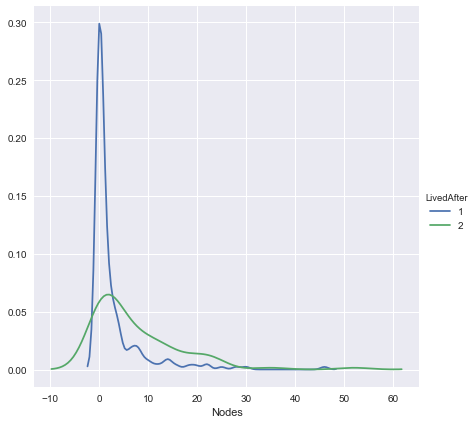

In [15]:
sns.FacetGrid(haberman, hue="LivedAfter", size=6) \
   .map(sns.kdeplot, "Nodes") \
   .add_legend()
#the numbers of people who have lived more is much higher as the plot says

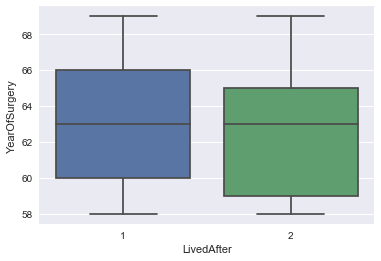

In [16]:
#lets check through a box plot with the year of surgery and survival inormation
%matplotlib inline
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="LivedAfter", y="YearOfSurgery", data=haberman)

this is again a very important plot as it seems. Here before 1960 less than 25 percent of people survived more than 5 years. and after 1963 mostly the people have survived.

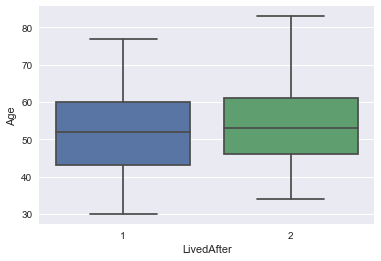

In [17]:
#lets now see the dependencies between age and Survival rate.
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="LivedAfter", y="Age", data=haberman)

this plot says that if a patient while operation his age is more than 60 then the rate of not surviving is less than 75% 

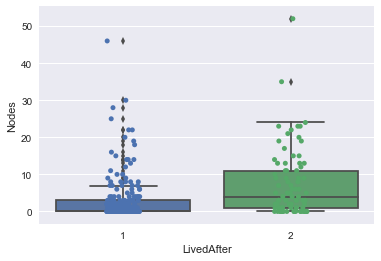

In [21]:
#lets extend the most important observation that people have'nt survived for more than 5 years if number of axillary nodes
#detected are 4
#we will adding layer of individual points on top of the box plot
#we will use jitter=True so that all points don't fall on single vertical lines above the "survival"
ax = sns.boxplot(x="LivedAfter", y="Nodes", data=haberman)
ax = sns.stripplot(x="LivedAfter", y="Nodes", data=haberman, jitter=True, edgecolor="gray")

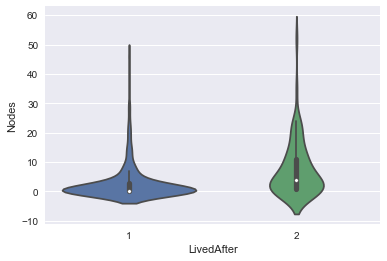

In [23]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="LivedAfter", y="Nodes", data=haberman, size=6)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000150C0D30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000155520B8>]], dtype=object)

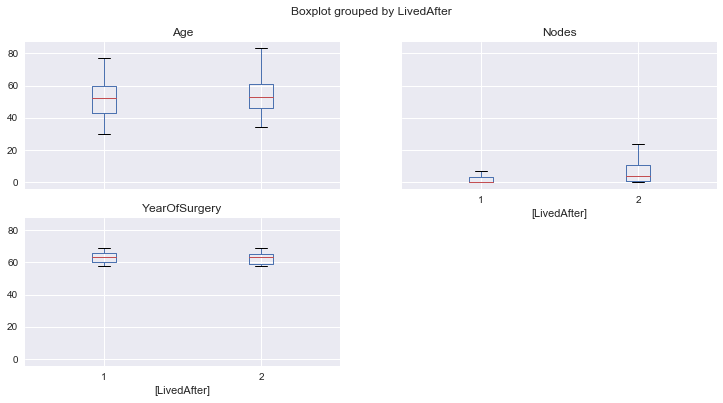

In [26]:
#we go back to pandas and draw quickly a box plot with each feature split out by "LivedAfter"
haberman.boxplot(by="LivedAfter", figsize=(12, 6))

1.we can see here that "nodes" in y axis with "livedAfter" or "survival" at x axis gives the most distinguishable plot. 
2.If the "Age" is less then also the chances of "survival" is somewhat more
3.Again if "the year of surgery" is high then the patient is more likely to survive.



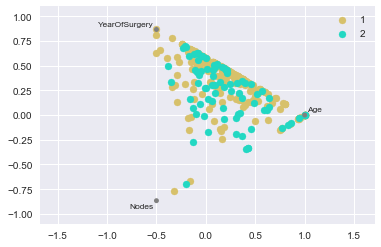

In [27]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.tools.plotting import radviz
radviz(haberman, "LivedAfter")